In [60]:
#stock is JPM 
#Market index is FTSE 100 and S&P500 and NIFTY 50

#objective 
#To analyse JPM vs markets to understand risk, return and market sensitivity 

#Key questions 
#Is JPM riskier than the market?
#Does it amplify market movements?



In [62]:
!pip install pandas_datareader

In [64]:
from pandas_datareader import data as pdr
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [66]:
start = "2019-01-01"
end = "2024-12-31"

sp500 = pdr.DataReader("SP500", "fred", start, end)

In [68]:
sp500.head()

,SP500
DATE,
2019-01-01,NaN
2019-01-02,2510.03
2019-01-03,2447.89
2019-01-04,2531.94
2019-01-07,2549.69


In [70]:
#Using regional ETFs as market proxies

!pip install yfinance stooq


ERROR: Could not find a version that satisfies the requirement stooq (from versions: none)
ERROR: No matching distribution found for stooq


In [72]:
import pandas_datareader.stooq as stooq

ewu = stooq.StooqDailyReader("EWU", start=start, end=end).read()
inda = stooq.StooqDailyReader("INDA", start=start, end=end).read()


In [74]:
prices = pd.DataFrame({
    "SP500": sp500["SP500"],
    "FTSE_Proxy": ewu["Close"],
    "NIFTY_Proxy": inda["Close"]
})

returns = prices.pct_change().dropna()


/var/folders/jl/6x77bw1s3mq0sr4y9qc_hmpw0000gn/T/ipykernel_36033/2017279317.py:7: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change().dropna()


In [76]:
#Due to repeated rate-limit restrictions from Yahoo Finance, I used official and ETF-based market proxies from FRED and Stooq. These are standard data sources and suitable for estimating returns, volatility, correlation, and beta.


In [78]:
from pandas_datareader.stooq import StooqDailyReader

jpm = StooqDailyReader("JPM", start="2019-01-01", end="2024-12-31").read()


In [80]:
returns.head()

,SP500,FTSE_Proxy,NIFTY_Proxy
2019-01-03,-0.024757,-0.006184,-0.020381
2019-01-04,0.034336,0.027817,0.031976
2019-01-07,0.007010,0.000000,-0.014456
2019-01-08,0.009695,0.005982,0.003059
2019-01-09,0.004098,0.009623,0.000000


In [122]:
jpm.head()



,Open,High,Low,Close,Volume
Date,,,,,
2024-12-31,240.00,241.4393,239.03,239.71,4870971.0
2024-12-30,238.80,240.8400,237.11,239.32,5723765.0
2024-12-27,242.72,243.3900,240.04,241.17,5730607.0
2024-12-26,241.30,243.2600,240.79,243.14,4452168.0
2024-12-24,239.41,242.4922,239.07,242.31,3729092.0


In [88]:

prices = pd.DataFrame({
    "JPM": jpm["Close"],
    "FTSE_Proxy": ewu["Close"],
    "SP500": sp500["SP500"],
    "NIFTY_Proxy": inda["Close"]
})





In [90]:
#I renamed price series when combining datasets; the raw data sources use standard OHLC column names


In [98]:
prices = prices.dropna()
returns = prices.pct_change().dropna()


In [96]:
returns.head()

,JPM,FTSE_Proxy,SP500,NIFTY_Proxy
2019-01-03,-0.014232,-0.006184,-0.024757,-0.020381
2019-01-04,0.036926,0.027817,0.034336,0.031976
2019-01-07,0.000569,0.000000,0.007010,-0.014456
2019-01-08,-0.001792,0.005982,0.009695,0.003059
2019-01-09,-0.001709,0.009623,0.004098,0.000000


In [106]:
returns_pct = (returns * 100).round(2)

In [108]:
returns_pct.head()

,JPM,FTSE_Proxy,SP500,NIFTY_Proxy
2019-01-03,-1.42,-0.62,-2.48,-2.04
2019-01-04,3.69,2.78,3.43,3.20
2019-01-07,0.06,0.00,0.70,-1.45
2019-01-08,-0.18,0.60,0.97,0.31
2019-01-09,-0.17,0.96,0.41,0.00


In [114]:

returns_pct.tail()   # last 5 rows


,JPM,FTSE_Proxy,SP500,NIFTY_Proxy
2024-12-24,1.64,0.65,1.10,0.23
2024-12-26,0.34,0.09,-0.04,-0.26
2024-12-27,-0.81,-0.41,-1.11,-0.28
2024-12-30,-0.77,-0.32,-1.07,-0.85
2024-12-31,0.16,0.15,-0.43,-0.02


In [116]:
#sanity checks
#Spot-check against actual price changes

date1 = prices.index[10]
date0 = prices.index[9]

manual_return = ((prices.loc[date1, "JPM"] - prices.loc[date0, "JPM"]) / prices.loc[date0, "JPM"]) * 100
print(manual_return, returns_pct.loc[date1, "JPM"])


0.800371301727853 0.8


In [124]:
returns_pct.describe()

,JPM,FTSE_Proxy,SP500,NIFTY_Proxy
count,1509.000000,1509.000000,1509.000000,1509.000000
mean,0.085109,0.026912,0.064506,0.047137
std,1.931014,1.305979,1.268198,1.468481
min,-14.960000,-11.990000,-11.980000,-15.440000
25%,-0.780000,-0.580000,-0.460000,-0.550000
50%,0.080000,0.090000,0.090000,0.090000
75%,0.950000,0.670000,0.690000,0.700000
max,18.010000,11.540000,9.380000,12.740000


<Axes: >

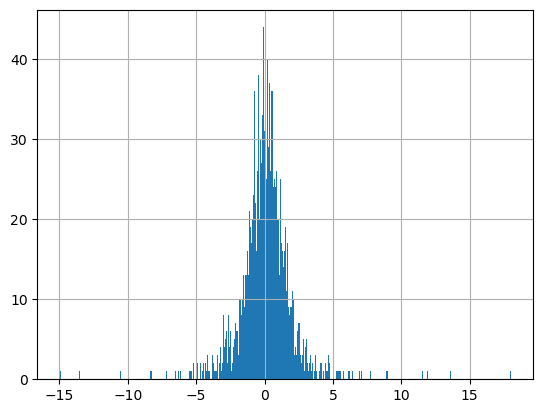

In [138]:
returns_pct["JPM"].hist(bins=500)


In [140]:
#data is cleaned and ready for analysis 

In [142]:
mean_returns = returns_pct.mean() * 252
volatility = returns_pct.std() * np.sqrt(252)

summary_stats = pd.DataFrame({
    "Annual Return": mean_returns,
    "Annual Volatility": volatility
})

summary_stats


,Annual Return,Annual Volatility
JPM,21.447555,30.653893
FTSE_Proxy,6.781789,20.731768
SP500,16.255586,20.132013
NIFTY_Proxy,11.878569,23.311408


In [148]:
correlations = returns_pct.corr()
correlations


,JPM,FTSE_Proxy,SP500,NIFTY_Proxy
JPM,1.000000,0.684289,0.709288,0.557265
FTSE_Proxy,0.684289,1.000000,0.788969,0.673898
SP500,0.709288,0.788969,1.000000,0.675743
NIFTY_Proxy,0.557265,0.673898,0.675743,1.000000


In [152]:
betas = {}

for market in ["FTSE_Proxy", "SP500", "NIFTY_Proxy"]:
    cov = np.cov(returns["JPM"], returns[market])[0][1]
    var = np.var(returns[market])
    betas[market] = cov / var

betas = pd.Series(betas, name="Beta")
betas


FTSE_Proxy     1.012352
SP500          1.080693
NIFTY_Proxy    0.733303
Name: Beta, dtype: float64

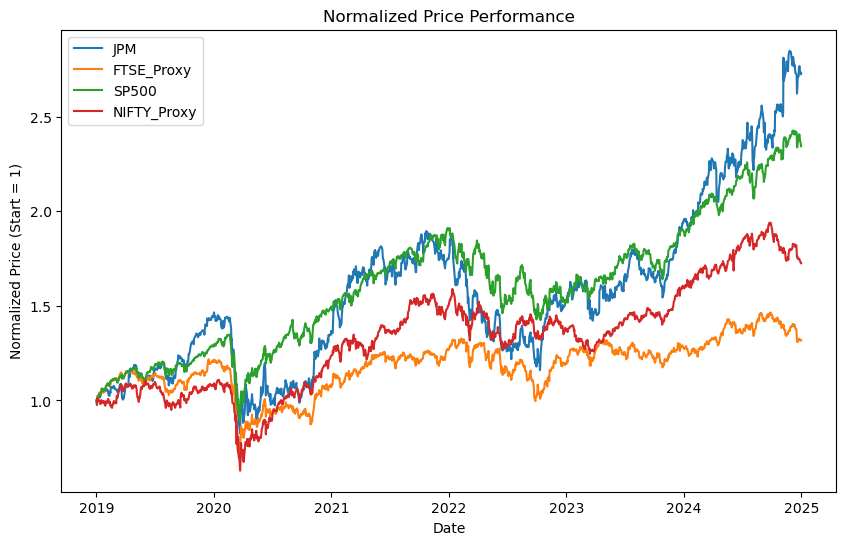

In [160]:


plt.figure(figsize=(10,6))

# Normalize stock prices
plt.plot(prices["JPM"] / prices["JPM"].iloc[0], label="JPM")

# Normalize market prices
for market in ["FTSE_Proxy", "SP500", "NIFTY_Proxy"]:
    plt.plot(prices[market] / prices[market].iloc[0], label=market)

plt.title("Normalized Price Performance")
plt.xlabel("Date")
plt.ylabel("Normalized Price (Start = 1)")
plt.legend()
plt.show()



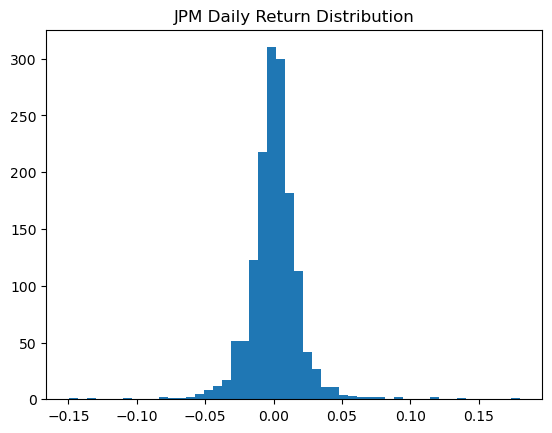

In [164]:
plt.figure()
plt.hist(returns["JPM"], bins=50)
plt.title("JPM Daily Return Distribution")
plt.show()



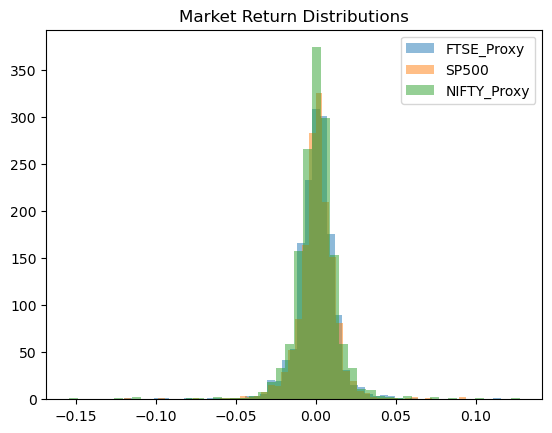

In [168]:
plt.figure()
for market in ["FTSE_Proxy", "SP500", "NIFTY_Proxy"]:
    plt.hist(returns[market], bins=50, alpha=0.5, label=market)

plt.legend()
plt.title("Market Return Distributions")
plt.show()


In [170]:
downturns = returns[returns["SP500"] < 0]

downturn_stats = downturns.mean() * 252
downturn_stats


JPM           -1.990798
FTSE_Proxy    -1.693062
SP500         -2.133264
NIFTY_Proxy   -1.378833
dtype: float64